## **Heart Disease Prediction Using K-Nearest Neighbors (KNN)**

In [ ]:
#import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#load dataset
df = pd.read_csv('/content/heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Data Preprocessing

## **1. Data inspection and cleaning**

##### **1.1. Identifying and handling Missing Values **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Identify columns
num_cols = ["Age", "RestingBP", "Cholesterol", 'FastingBS',"MaxHR", "Oldpeak",'HeartDisease']
cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

In [ ]:
# Handle invalid zeros
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [ ]:
#Handle numerical data
# Impute missing values
num_imputer = SimpleImputer(strategy='median', missing_values=np.nan)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [ ]:
#Handle Categorical data
# Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
df.isnull().sum()

,0
Age,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


##### **1.2. Checking Data Types of Columns in the Dataset **

In [ ]:
# Check data types for all columns
print("\n" + "="*40)
print("Data Types of All Columns:")
print("="*40)
print(df.dtypes)


Data Types of All Columns:
Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object


##### **1.3. Identifying and handling Outliers **


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


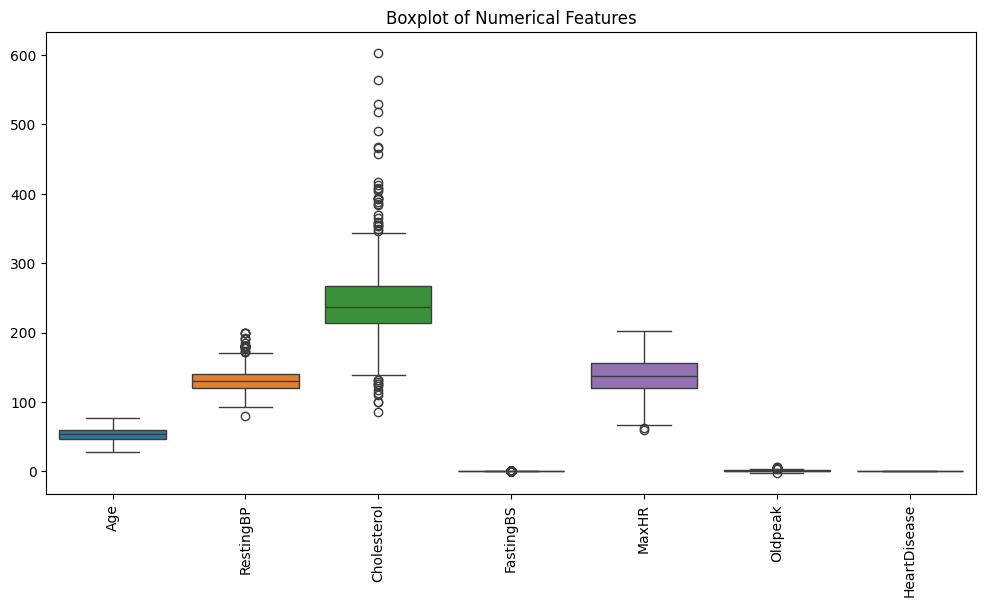

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)  # Rotate column names for better visibility
plt.title("Boxplot of Numerical Features")
plt.show()

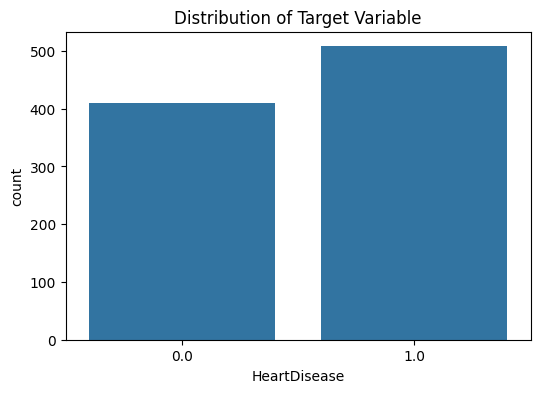

In [ ]:
#Check the Distribution of Target (y)
plt.figure(figsize=(6,4))
sns.countplot(x=df['HeartDisease'])
plt.title("Distribution of Target Variable")
plt.show()

              Cholesterol  HeartDisease
Cholesterol      1.000000      0.076114
HeartDisease     0.076114      1.000000


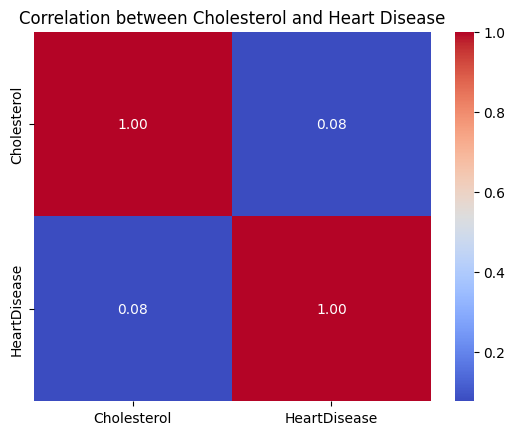

In [ ]:
# Compute correlation
correlation = df[['Cholesterol', 'HeartDisease']].corr()
print(correlation)

# Visualize correlation using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Cholesterol and Heart Disease")
plt.show()

In [ ]:
df['HeartDisease'] = np.log1p(df['HeartDisease'])

In [ ]:
cols = ["Age", "RestingBP", "Cholesterol", 'FastingBS',"MaxHR", "Oldpeak"]
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

##### **1.4. Identifying and handling duplicate Values **

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Total Duplicate Rows:", duplicate_rows.sum())

Total Duplicate Rows: 0


In [ ]:
print(df.shape)
print(df.isnull().sum())

(643, 12)
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## **2. Identifying and Encoding Categorical Features**

In [ ]:
# Define order for ordinal variables
ordinal_mapping = [
    ['Down', 'Flat', 'Up'],  # ST_Slope order
    ['ASY', 'NAP', 'ATA'],   # ChestPainType order
    ['Normal', 'ST', 'LVH'], # RestingECG order
    ['N', 'Y']               # ExerciseAngina order
]

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping, handle_unknown='use_encoded_value', unknown_value=-1)

# Encode the columns
df[['ST_Slope', 'ChestPainType', 'RestingECG', 'ExerciseAngina']] = ordinal_encoder.fit_transform(df[['ST_Slope', 'ChestPainType', 'RestingECG', 'ExerciseAngina']])

In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [ ]:
df.isnull().sum()

,0
Age,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
ST_Slope,0


In [ ]:
X.reset_index(drop=True, inplace=True)
df.shape

(643, 12)

## **3. Data Normalization**

In [ ]:
cols_to_scale = ["Age", "RestingBP", "Cholesterol","MaxHR", "Oldpeak"]
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
# #Split data
X= df.drop('HeartDisease', axis=1)
Y=df['HeartDisease']

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, Y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

# Predictions
y_pred =knn.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9376


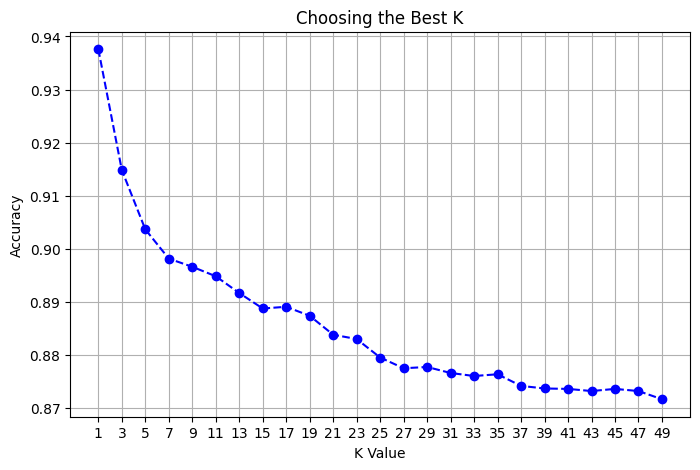

Best K: 1


<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()
# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")